In [1]:
# Import necessary packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os
from matplotlib import cm
import matplotlib.patches as mpatches
from matplotlib.ticker import MaxNLocator
from helper_functions import date_to_decimal_year, roll_rain_bar, eruption_counter, seasonal_plotter, rain_predictor

In [2]:
# Create path to data
folder_path = '/Users/jonathanquartin/Documents/Coding/GitHub/um_volcano_project/GALAPAGOS_DATA'

In [3]:
# Import tables
eruptions = pd.read_csv(os.path.join(folder_path, "eruptions_galapagos3.csv"))
rainfall = pd.read_csv(os.path.join(folder_path, "cleaned_precip_galap.csv"))

bellavista = pd.read_csv(os.path.join(folder_path, "climate_bellavista.csv"))
ayora = pd.read_csv(os.path.join(folder_path, "climate_puerto-ayora.csv"))

Eruption data must have columns: 'Volcano' and 'Start'. 'Start' is the beginning date of the eruption given as a string-- YYYY-MM-DD.

Rainfall data must have columns: 'Date', 'Longitude', 'Latitude', 'Precipitation'. 'Date' is given as a string YYYY-MM-DD and the other three columns are floats.

In [4]:
volcanos = {'Wolf': (-91.35, .05), 'Fernandina': (-91.55, -.35), 'Negra, Sierra': (-91.15, -.85), 'Azul, Cerro': (-91.35, -.95) } # Long/lat pairs must exist in rainfall data
quantiles = 4 # Number of bins to break up rainfall into
rolling_number = 90 # Number of days to average rainfall over
scale = True # If true, applies a log scaling to the data
elninos = [['2015-08-01', '2016-03-31']] # Enter El Nino events of interest as two element lists of start/end dates

# Use rain predictor

print_summary = False # Make true if you want to see summary of regression
compare_site = ayora  # Choose ayora or bellavista to compare rainfall to
rainfall = rain_predictor(rainfall, volcanos, compare_site, rolling_number, print_summary)

We look at rolling averages of rainfall at each volcano site. We group dates at each volcano into quantiles based on the rolling rain averages. In gray, we've included the cumulative precipitation.

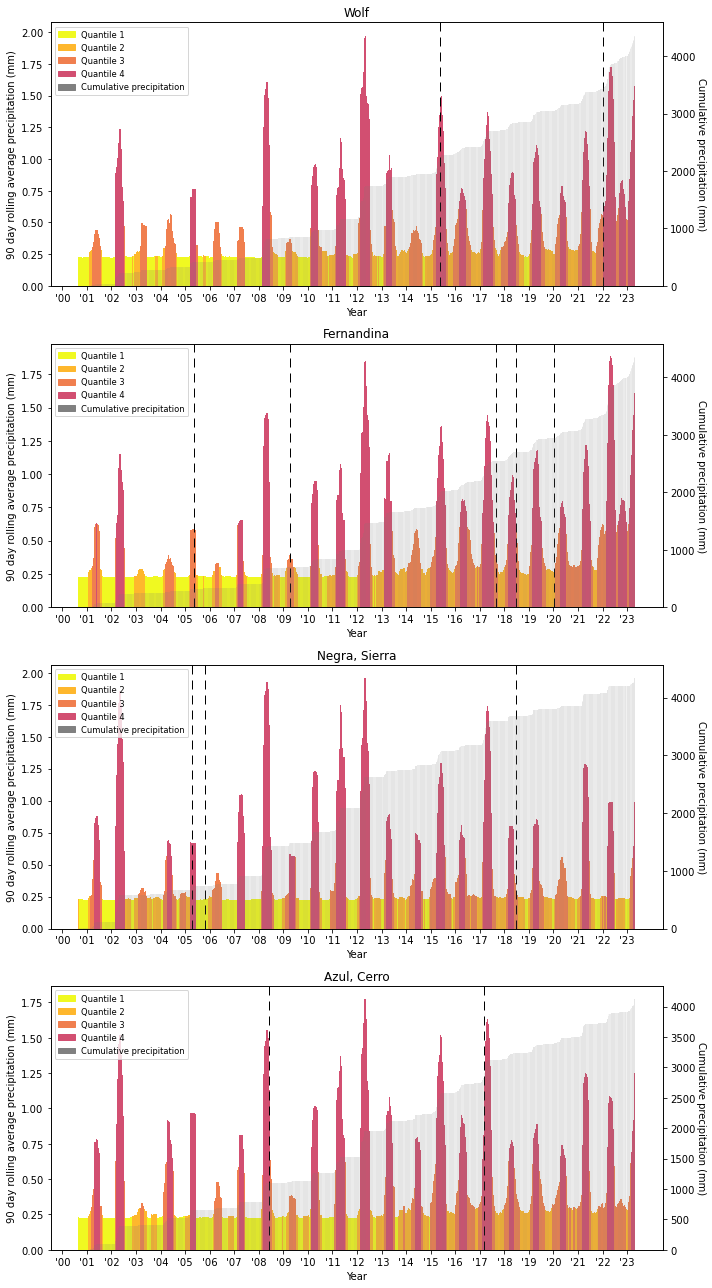

In [5]:
roll_rain_bar(volcanos, eruptions, rainfall, quantiles, rolling_number, scale)

Below we break up eruptions into quantiles, first all together, and then by individual volcano.

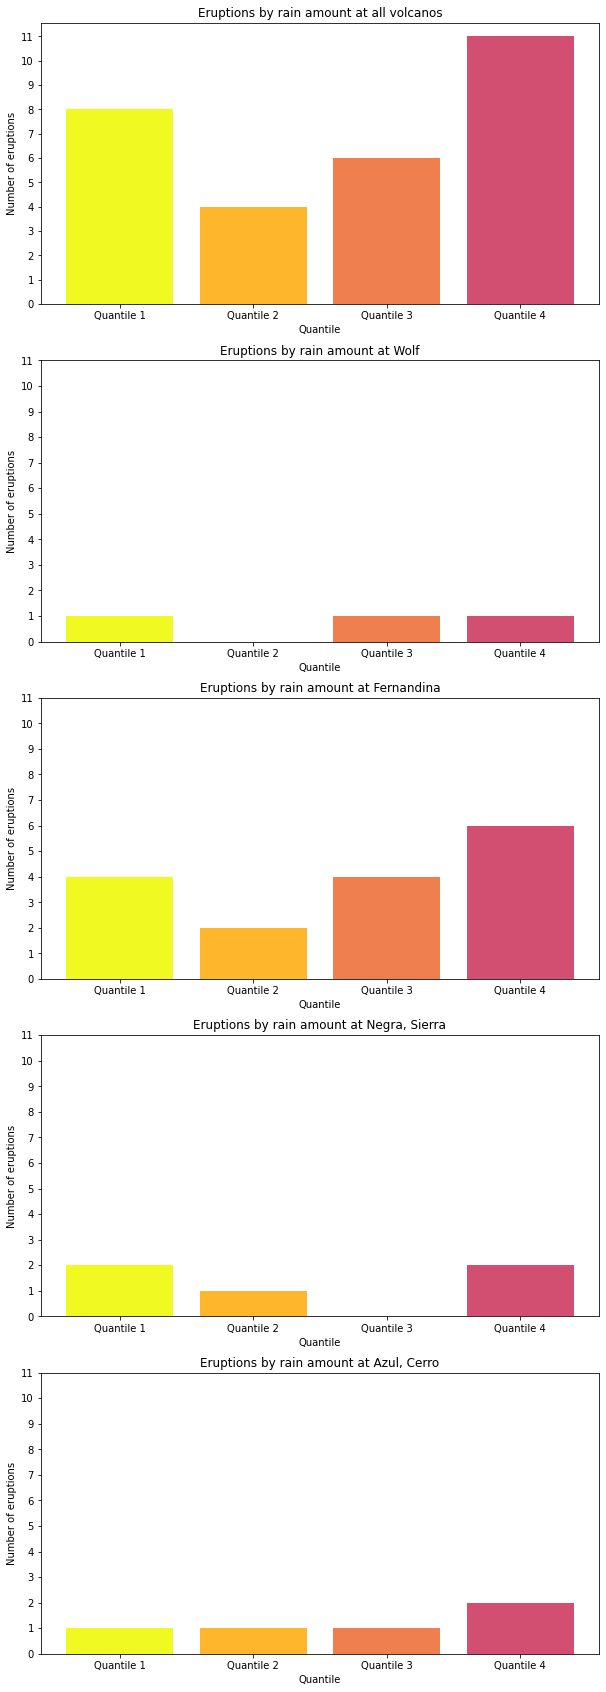

In [5]:
eruption_counter(volcanos, eruptions, rainfall, quantiles, rolling_number)

Below, we plot rainfall at the volcano sites by year.

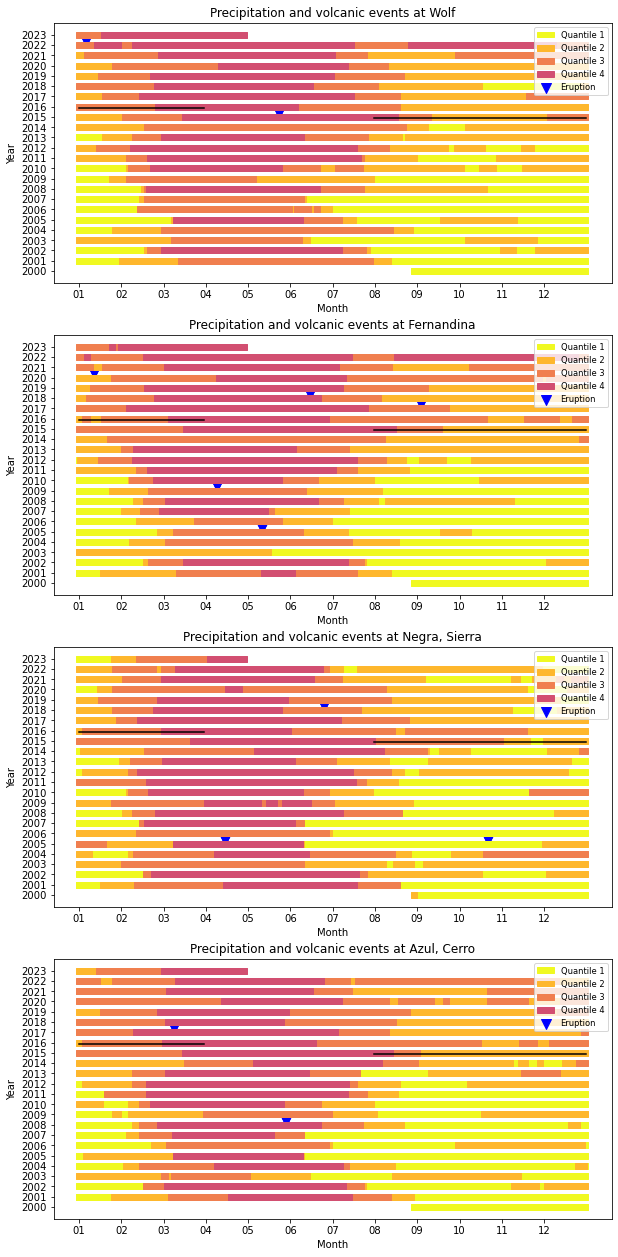

In [7]:
seasonal_plotter(volcanos, eruptions, rainfall, elninos, quantiles, rolling_number)